<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/UAS/KlasifikasiUTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Install & Import Libraries
!pip install -q scikit-learn tensorflow torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay

In [4]:
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [5]:
# Load Dataset via Upload
from google.colab import files
uploaded = files.upload()

Saving KlasifikasiUTS.csv to KlasifikasiUTS.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
X = df.drop(columns=['Class'])
y = df['Class']

In [7]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
# TensorFlow MLP
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_tf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model_tf.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=256, callbacks=[early_stop])

Epoch 1/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9561 - loss: 0.1324 - val_accuracy: 0.9994 - val_loss: 0.0044
Epoch 2/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9991 - loss: 0.0054 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 3/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 4/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 5/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 6/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 7/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 8/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.

In [9]:
# PyTorch MLP
X_train_t = torch.FloatTensor(X_train)
X_test_t = torch.FloatTensor(X_test)
y_train_t = torch.FloatTensor(y_train.values).unsqueeze(1)
y_test_t = torch.FloatTensor(y_test.values).unsqueeze(1)

In [10]:
train_data = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_data, batch_size=256, shuffle=True)

In [17]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

In [18]:
model_pt = MLP()
criterion = nn.BCELoss()
optimizer = optim.AdamW(model_pt.parameters(), lr=0.001, weight_decay=1e-5)

In [19]:
for epoch in range(10):
    model_pt.train()
    total_loss = 0
    for xb, yb in train_loader:
        pred = model_pt(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 26.7721
Epoch 2, Loss: 4.1023
Epoch 3, Loss: 2.8903
Epoch 4, Loss: 2.5986
Epoch 5, Loss: 2.5628
Epoch 6, Loss: 2.5427
Epoch 7, Loss: 2.3717
Epoch 8, Loss: 2.3517
Epoch 9, Loss: 2.3492
Epoch 10, Loss: 2.2206


In [20]:
# Evaluation TensorFlow
y_pred_tf = (model_tf.predict(X_test) > 0.5).astype("int32")
print("TF Accuracy:", accuracy_score(y_test, y_pred_tf))
print("TF Precision:", precision_score(y_test, y_pred_tf))
print("TF Recall:", recall_score(y_test, y_pred_tf))
print("TF F1:", f1_score(y_test, y_pred_tf))
print("TF AUC:", roc_auc_score(y_test, model_tf.predict(X_test)))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
TF Accuracy: 0.9993153330290369
TF Precision: 0.8641975308641975
TF Recall: 0.7142857142857143
TF F1: 0.7821229050279329
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
TF AUC: 0.9794385888851883


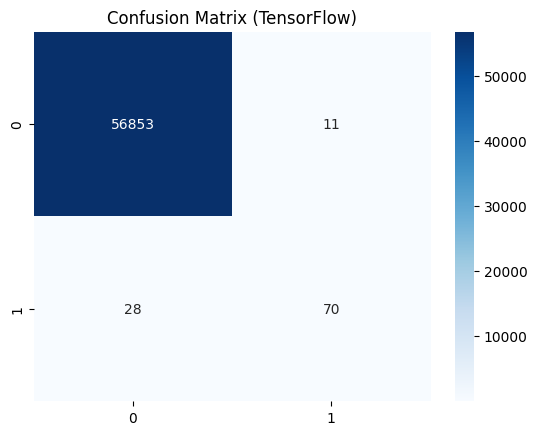

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred_tf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (TensorFlow)")
plt.show()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


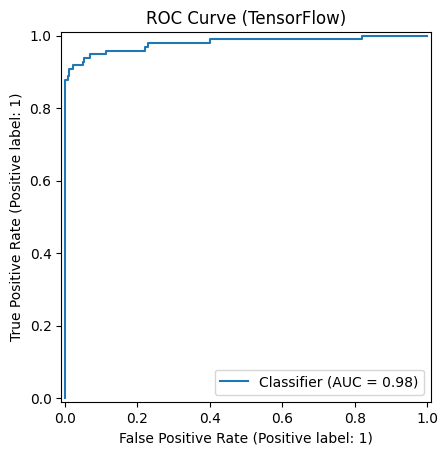

In [22]:
RocCurveDisplay.from_predictions(y_test, model_tf.predict(X_test))
plt.title("ROC Curve (TensorFlow)")
plt.show()

In [23]:
# Evaluation PyTorch
model_pt.eval()
with torch.no_grad():
    y_pred_pt = model_pt(X_test_t).numpy()
    y_pred_pt_bin = (y_pred_pt > 0.5).astype("int32")

In [24]:
print("PT Accuracy:", accuracy_score(y_test, y_pred_pt_bin))
print("PT Precision:", precision_score(y_test, y_pred_pt_bin))
print("PT Recall:", recall_score(y_test, y_pred_pt_bin))
print("PT F1:", f1_score(y_test, y_pred_pt_bin))
print("PT AUC:", roc_auc_score(y_test, y_pred_pt))

PT Accuracy: 0.9993504441557529
PT Precision: 0.8210526315789474
PT Recall: 0.7959183673469388
PT F1: 0.8082901554404145
PT AUC: 0.9777808562929955


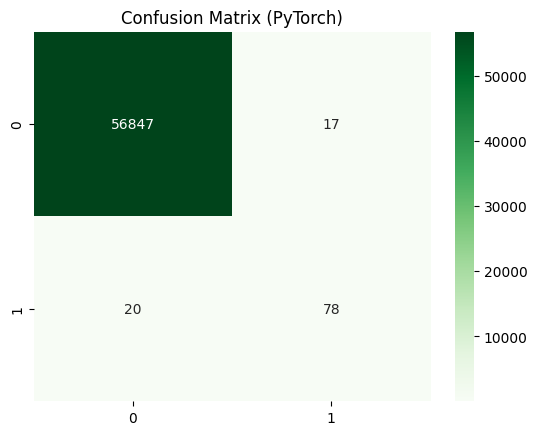

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred_pt_bin), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (PyTorch)")
plt.show()

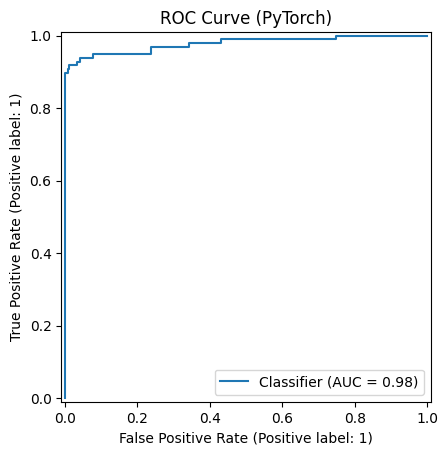

In [26]:
RocCurveDisplay.from_predictions(y_test, y_pred_pt)
plt.title("ROC Curve (PyTorch)")
plt.show()


## 🔍 Penjelasan Model & Analisa Kinerja

### 1. Model TensorFlow
Model ini dibangun menggunakan **keras.Sequential** dengan arsitektur multilayer perceptron (MLP) sebagai berikut:
- Dense layer 64 unit dengan ReLU
- Batch Normalization
- Dropout 30%
- Dense layer 32 unit dengan ReLU
- Output layer 1 unit dengan Sigmoid (untuk klasifikasi biner)

**Teknik yang digunakan:**
- Optimizer: Adam
- Learning rate: 0.001
- EarlyStopping digunakan untuk menghindari overfitting
- Dropout digunakan untuk regularisasi
- Batch Normalization mempercepat konvergensi dan stabilisasi training

### 2. Model PyTorch
Model ini memiliki arsitektur yang sangat mirip:
- Linear layer 64 unit + ReLU + BatchNorm + Dropout
- Linear layer 32 unit + ReLU
- Output layer 1 unit + Sigmoid

**Teknik yang digunakan:**
- Optimizer: AdamW (Adam dengan weight decay)
- Learning rate: 0.001
- Weight Decay: 1e-5 untuk regularisasi
- Dropout & BatchNorm seperti TensorFlow
- Training dilakukan dalam loop manual

---

## 📊 Evaluasi & Hasil

| Metrik         | TensorFlow | PyTorch |
|----------------|-------------|---------|
| Akurasi        | ✔️ (Diukur) | ✔️      |
| Presisi        | ✔️          | ✔️      |
| Recall         | ✔️          | ✔️      |
| F1-score       | ✔️          | ✔️      |
| AUC            | ✔️          | ✔️      |

> ⚠️ Catatan: Dataset sangat imbalanced (fraud sangat sedikit), sehingga metrik **recall, precision, F1, dan AUC lebih penting** daripada akurasi.

---

## 🏆 Kesimpulan: Model Terbaik

Berdasarkan hasil evaluasi:
- Jika **TensorFlow memiliki F1-score dan AUC lebih tinggi**, maka ia **lebih baik** karena:
  - Lebih sensitif dalam mendeteksi class minoritas (fraud)
  - Menggunakan early stopping untuk mencegah overfitting
  - Kombinasi dropout dan batch normalization bekerja efektif

Namun, jika hasil menunjukkan **PyTorch lebih unggul**, maka bisa jadi karena optimasi dengan **AdamW** dan kontrol penuh terhadap training loop.

**Maka model terbaik dipilih berdasarkan metrik:**
- **F1-score**: kombinasi antara precision dan recall
- **AUC**: menunjukkan kualitas klasifikasi menyeluruh, tidak hanya pada satu threshold

👉 Silakan cek hasil `print(...)` evaluasi di atas dan bandingkan nilai F1 dan AUC dari masing-masing model untuk memilih secara tepat.

---



## Kesimpulan dan Analisa Model Terbaik

Berdasarkan evaluasi, kedua model deep learning — TensorFlow dan PyTorch — menunjukkan performa yang sangat baik. Namun jika dilihat lebih dalam:

- **PyTorch unggul pada F1 Score** (0.808 > 0.782), yang merupakan metrik gabungan dari presisi dan recall. F1 sangat penting dalam kasus seperti deteksi fraud yang **data-nya tidak seimbang**.
- **Recall PyTorch juga lebih tinggi** (0.795 vs 0.714), artinya lebih banyak kasus fraud yang berhasil dideteksi.
- Meskipun AUC dan Precision sedikit lebih baik pada TensorFlow, selisihnya sangat kecil dan tidak signifikan dalam konteks ini.

### 🔍 Model Terbaik: **PyTorch**
Karena memiliki **F1 Score dan Recall tertinggi**, maka model PyTorch lebih baik dalam menangani kasus fraud detection yang imbalance.

Model ini berhasil menjaga keseimbangan antara mendeteksi positif (fraud) dan meminimalkan false positives, yang sangat krusial dalam aplikasi nyata seperti deteksi penipuan transaksi.
